In [61]:
import boto3
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
from decimal import Decimal

In [10]:
# Initialize DynamoDB client
dynamodb = boto3.resource('dynamodb', region_name='us-east-2')  # Replace with your region
table = dynamodb.Table('StockDataAnalysis')  # Replace with your table name

In [11]:
# Fetch data for a specific topic
def fetch_data_by_topic(topic_name):
    response = table.scan(
        FilterExpression='topic_name = :topic',
        ExpressionAttributeValues={':topic': topic_name}
    )
    return response['Items']

In [23]:
# Process data for visualization
def process_data(data):
    timestamps = []
    open_prices = []
    close_prices = []
    high_prices = []
    low_prices = []
    volumes = []

    for item in data:
        timestamps.append(datetime.strptime(item['timestamp'], '%Y-%m-%d'))
        open_prices.append(float(item['open_price']))
        close_prices.append(float(item['close_price']))
        high_prices.append(float(item['high_price']))
        low_prices.append(float(item['low_price']))
        volumes.append(int(item['volume']))

    return timestamps, open_prices, close_prices, high_prices, low_prices, volumes

In [19]:
rt = table.scan()

In [22]:
len(rt['Items'])

6734

In [24]:
apple_data = pd.DataFrame(fetch_data_by_topic('apple_stock_data'))

In [25]:
twitter_data = pd.DataFrame(fetch_data_by_topic('twitter_stock_data'))

In [26]:
len(apple_data)

5538

In [27]:
len(twitter_data)

1196

In [28]:
apple_data.drop_duplicates()

,timestamp_topic,low_price,close_price,high_price,timestamp,open_price,volume,topic_name
0,1992-09-21_apple_stock_data,0.412946,0.415179,0.426339,1992-09-21,0.417411,89678400,apple_stock_data
1,1996-12-24_apple_stock_data,0.204241,0.206473,0.208705,1996-12-24,0.207589,57612800,apple_stock_data
2,1988-05-05_apple_stock_data,0.370536,0.372768,0.377232,1988-05-05,0.375,70459200,apple_stock_data
3,2022-01-03_apple_stock_data,177.710007,182.009995,182.880005,2022-01-03,177.830002,104487900,apple_stock_data
4,2018-11-05_apple_stock_data,49.5425,50.397499,51.0975,2018-11-05,51.075001,264654800,apple_stock_data
...,...,...,...,...,...,...,...,...
5533,1991-08-07_apple_stock_data,0.440848,0.449777,0.455357,1991-08-07,0.441964,211612800,apple_stock_data
5534,1999-09-09_apple_stock_data,0.659598,0.674665,0.678013,1999-09-09,0.674107,534083200,apple_stock_data
5535,2009-07-06_apple_stock_data,4.866071,4.950357,4.963929,2009-07-06,4.953571,498688400,apple_stock_data
5536,2021-03-15_apple_stock_data,120.419998,123.989998,124,2021-03-15,121.410004,92403800,apple_stock_data


In [29]:
twitter_data.drop_duplicates()

,timestamp_topic,low_price,close_price,high_price,timestamp,open_price,volume,topic_name
0,2017-08-30_twitter_stock_data,16.799999,16.93,17.040001,2017-08-30,16.92,6622392,twitter_stock_data
1,2014-12-15_twitter_stock_data,36.73,36.849998,38.380001,2014-12-15,38.130001,16832975,twitter_stock_data
2,2018-06-22_twitter_stock_data,44.5,45.880001,46.009998,2018-06-22,45.580002,31106299,twitter_stock_data
3,2015-04-17_twitter_stock_data,50.189999,50.66,52.16,2015-04-17,51.709999,16651531,twitter_stock_data
4,2015-04-20_twitter_stock_data,50.509998,51.400002,51.48,2015-04-20,51.07,10993147,twitter_stock_data
...,...,...,...,...,...,...,...,...
1191,2017-01-20_twitter_stock_data,16.459999,16.58,16.9,2017-01-20,16.82,14819915,twitter_stock_data
1192,2020-01-28_twitter_stock_data,32.849998,33.419998,33.66,2020-01-28,33.060001,9739386,twitter_stock_data
1193,2018-11-30_twitter_stock_data,30.110001,31.450001,31.549999,2018-11-30,31.15,25833199,twitter_stock_data
1194,2020-07-10_twitter_stock_data,34.860001,35.400002,35.759998,2020-07-10,35.459999,15238716,twitter_stock_data


In [59]:
# Apple stock data
# Convert "high_price" column to numeric if not already
apple_data['high_price'] = pd.to_numeric(apple_data['high_price'], errors='coerce')

# Calculate Descriptive Statistics for "high_price"
mean_high = apple_data['high_price'].mean()
median_high = apple_data['high_price'].median()
std_dev_high = apple_data['high_price'].std()
min_high = apple_data['high_price'].min()
max_high = apple_data['high_price'].max()

# Print the statistics
print("Descriptive Statistics for 'high_price' of apple stock data:")
print(f"Mean: {mean_high}")
print(f"Median: {median_high}")
print(f"Standard Deviation: {std_dev_high}")
print(f"Minimum: {min_high}")
print(f"Maximum: {max_high}")

Descriptive Statistics for 'high_price' of apple stock data:
Mean: 14.469406537919825
Median: 0.475446
Standard Deviation: 31.113368533855066
Minimum: 0.049665
Maximum: 182.940002


In [60]:
# Twitter stock data
# Convert "high_price" column to numeric if not already
twitter_data['high_price'] = pd.to_numeric(twitter_data['high_price'], errors='coerce')

# Calculate Descriptive Statistics for "high_price"
mean_high = twitter_data['high_price'].mean()
median_high = twitter_data['high_price'].median()
std_dev_high = twitter_data['high_price'].std()
min_high = twitter_data['high_price'].min()
max_high = twitter_data['high_price'].max()

# Print the statistics
print("Descriptive Statistics for 'high_price' of twitter stock data:")
print(f"Mean: {mean_high}")
print(f"Median: {median_high}")
print(f"Standard Deviation: {std_dev_high}")
print(f"Minimum: {min_high}")
print(f"Maximum: {max_high}")

Descriptive Statistics for 'high_price' of twitter stock data:
Mean: 36.88246404264214
Median: 36.205
Standard Deviation: 14.625485037249302
Minimum: 14.22
Maximum: 79.080002


In [30]:
# Convert timestamp to datetime
apple_data['timestamp'] = pd.to_datetime(apple_data['timestamp'])

In [31]:
twitter_data['timestamp'] = pd.to_datetime(twitter_data['timestamp'])

In [32]:
# Add a 'month' column for grouping
apple_data['month'] = apple_data['timestamp'].dt.month
twitter_data['month'] = twitter_data['timestamp'].dt.month

In [33]:
# Average Close Price by Month for Apple
apple_avg_close = apple_data.groupby('month')['close_price'].mean()


In [34]:
# Average Close Price by Month for Twitter
twitter_avg_close = twitter_data.groupby('month')['close_price'].mean()

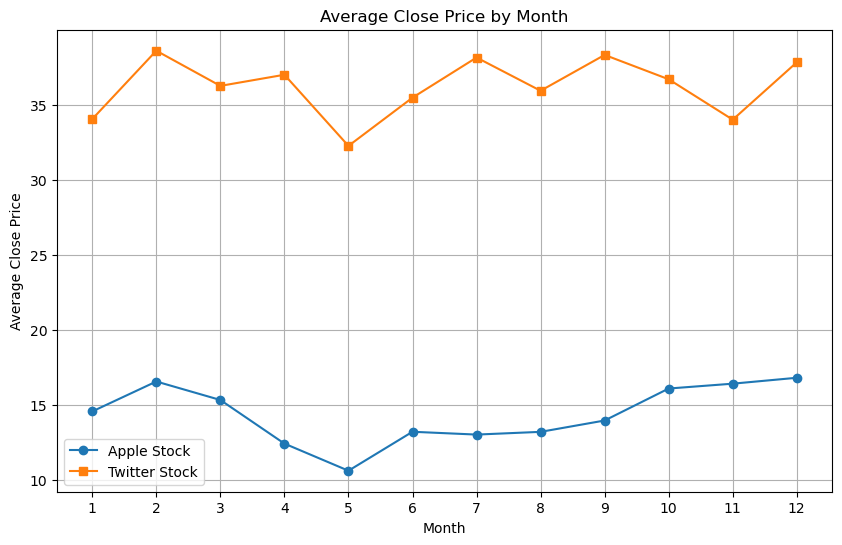

In [35]:
# Plot Average Close Price by Month
plt.figure(figsize=(10, 6))
apple_avg_close.plot(kind='line', marker='o', label='Apple Stock')
twitter_avg_close.plot(kind='line', marker='s', label='Twitter Stock')
plt.title('Average Close Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.xticks(range(1, 13))
plt.legend()
plt.grid()
plt.show()

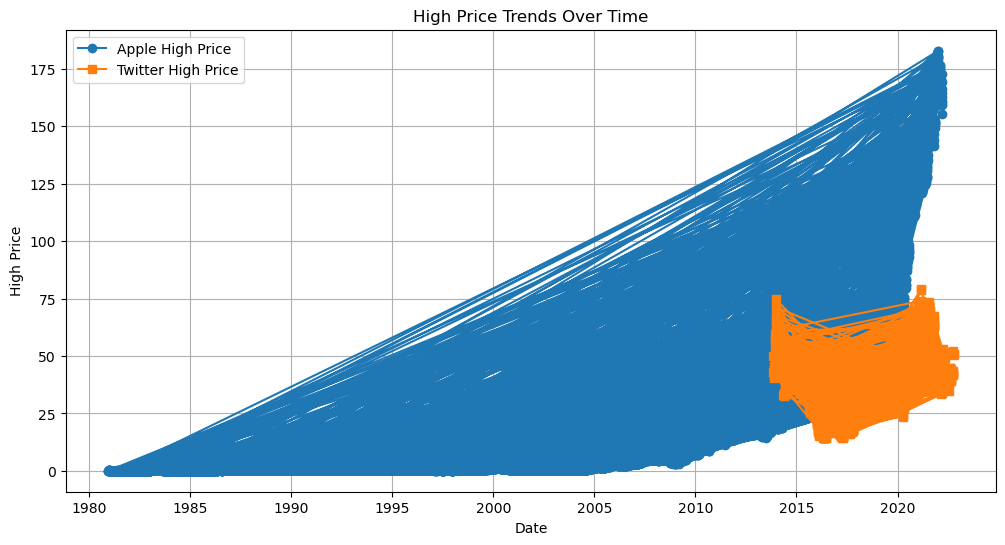

In [36]:
# High Price Trends Over Time
plt.figure(figsize=(12, 6))
plt.plot(apple_data['timestamp'], apple_data['high_price'], marker='o', label='Apple High Price')
plt.plot(twitter_data['timestamp'], twitter_data['high_price'], marker='s', label='Twitter High Price')
plt.title('High Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend()
plt.grid()
plt.show()

In [37]:
# Resample data to calculate monthly averages
apple_monthly_high = apple_data.resample('M', on='timestamp')['high_price'].mean()
twitter_monthly_high = twitter_data.resample('M', on='timestamp')['high_price'].mean()


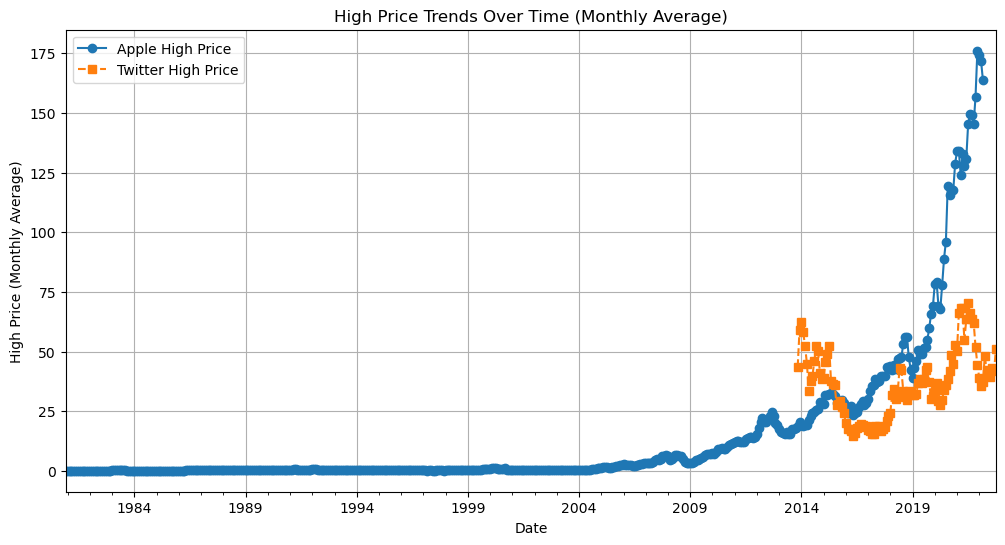

In [38]:
# Plot monthly high price trends
plt.figure(figsize=(12, 6))
apple_monthly_high.plot(label='Apple High Price', marker='o', linestyle='-')
twitter_monthly_high.plot(label='Twitter High Price', marker='s', linestyle='--')
plt.title('High Price Trends Over Time (Monthly Average)')
plt.xlabel('Date')
plt.ylabel('High Price (Monthly Average)')
plt.legend()
plt.grid()
plt.show()

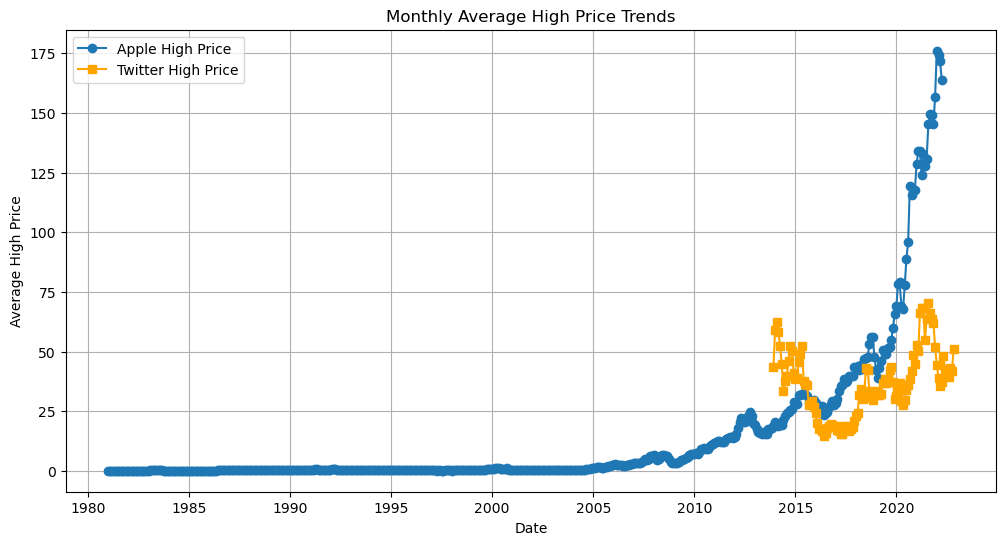

In [39]:

# Plot the aggregated high prices
plt.figure(figsize=(12, 6))
plt.plot(apple_monthly_high, marker='o', label='Apple High Price')
plt.plot(twitter_monthly_high, marker='s', label='Twitter High Price', color='orange')
plt.title('Monthly Average High Price Trends')
plt.xlabel('Date')
plt.ylabel('Average High Price')
plt.legend()
plt.grid()
plt.show()

In [49]:
year = 2020

# Filter data for the specific year
apple_filtered = apple_data[apple_data['timestamp'].dt.year == year]
twitter_filtered = twitter_data[twitter_data['timestamp'].dt.year == year]


In [50]:
# Aggregate high prices by month for the specified year
apple_monthly_high = apple_filtered.resample('M', on='timestamp')['high_price'].mean()
twitter_monthly_high = twitter_filtered.resample('M', on='timestamp')['high_price'].mean()


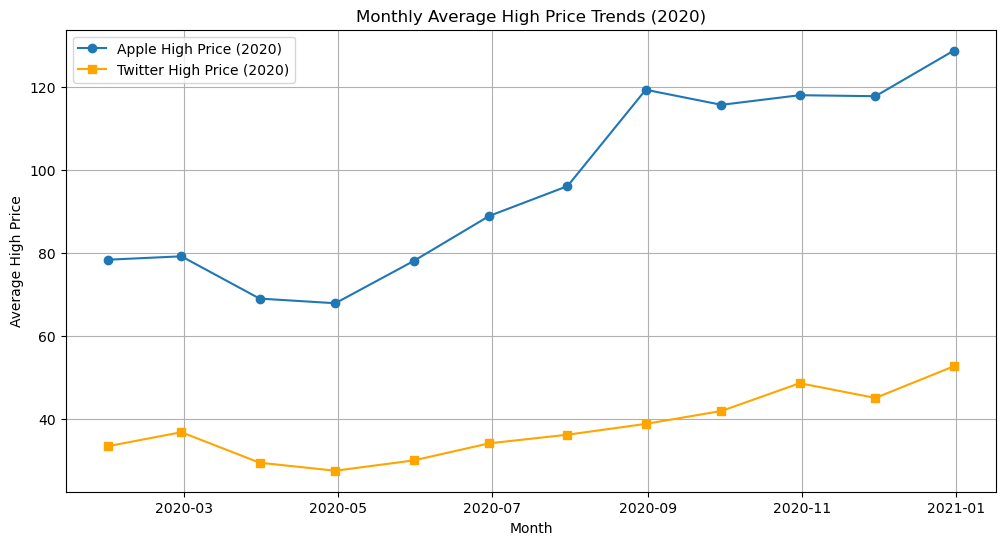

In [51]:
# Plot the aggregated high prices for the year
plt.figure(figsize=(12, 6))
plt.plot(apple_monthly_high, marker='o', label=f'Apple High Price ({year})')
plt.plot(twitter_monthly_high, marker='s', label=f'Twitter High Price ({year})', color='orange')
plt.title(f'Monthly Average High Price Trends ({year})')
plt.xlabel('Month')
plt.ylabel('Average High Price')
plt.legend()
plt.grid()
plt.show()

In [52]:
# Get unique years for Twitter data
twitter_years = twitter_data['timestamp'].dt.year.unique()
apple_years = apple_data['timestamp'].dt.year.unique()

# Identify common years between Apple and Twitter data
common_years = set(twitter_years).intersection(set(apple_years))

print("Years with Twitter data:", twitter_years)
print("Years with Apple data:", apple_years)
print("Common years for both datasets:", common_years)


Years with Twitter data: [2017 2014 2018 2015 2019 2020 2016 2021 2022 2013]
Years with Apple data: [1992 1996 1988 2022 2018 1980 2017 1999 2003 2002 2014 2006 2000 2011
 1991 2013 2021 2001 1983 1998 2016 2007 1982 1995 2012 2009 2005 2008
 1985 1981 2019 2015 1986 1989 1994 1997 2010 1990 1984 2020 1987 1993
 2004]
Common years for both datasets: {2016, 2017, 2018, 2019, 2020, 2021, 2022, 2013, 2014, 2015}


In [53]:
print(apple_data['volume'].head())
print(twitter_data['volume'].head())

0     89678400.0
1     57612800.0
2     70459200.0
3    104487900.0
4    264654800.0
Name: volume, dtype: float64
0     6622392.0
1    16832975.0
2    31106299.0
3    16651531.0
4    10993147.0
Name: volume, dtype: float64


In [54]:
apple_data['volume'] = pd.to_numeric(apple_data['volume'], errors='coerce')
twitter_data['volume'] = pd.to_numeric(twitter_data['volume'], errors='coerce')


In [55]:
apple_data['volume'].fillna(0, inplace=True)
twitter_data['volume'].fillna(0, inplace=True)


In [47]:
print(apple_data['volume'].dtype)
print(twitter_data['volume'].dtype)


float64
float64


In [56]:
# Filter data for the specific year
apple_filtered = apple_data[apple_data['timestamp'].dt.year == year]
twitter_filtered = twitter_data[twitter_data['timestamp'].dt.year == year]


In [57]:
# Aggregate volume by month for the specified year
apple_monthly_volume = apple_filtered.resample('M', on='timestamp')['volume'].sum()
twitter_monthly_volume = twitter_filtered.resample('M', on='timestamp')['volume'].sum()


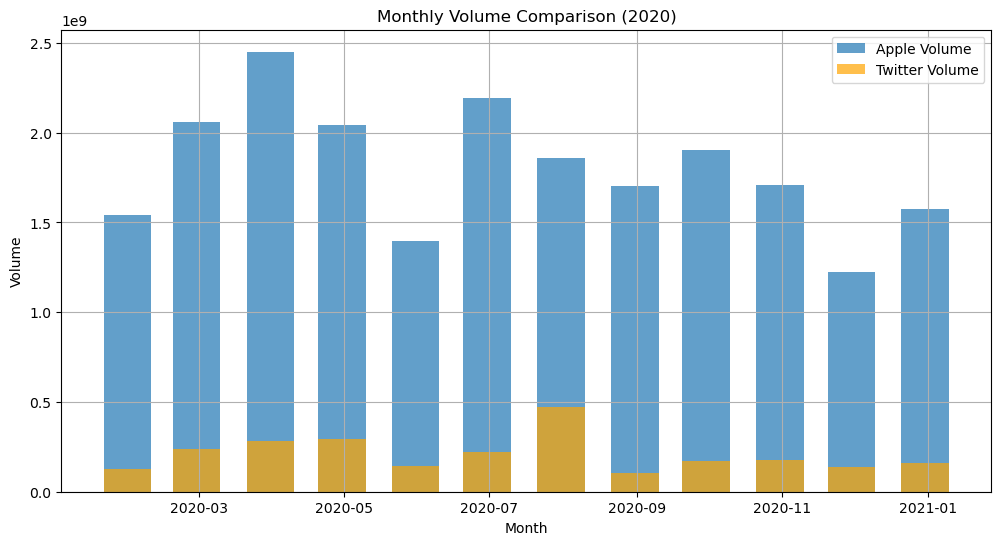

In [58]:
# Plot the aggregated volumes for the year
plt.figure(figsize=(12, 6))
plt.bar(apple_monthly_volume.index, apple_monthly_volume, width=20, alpha=0.7, label='Apple Volume')
plt.bar(twitter_monthly_volume.index, twitter_monthly_volume, width=20, alpha=0.7, label='Twitter Volume', color='orange')
plt.title(f'Monthly Volume Comparison ({year})')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()


In [65]:
apple_data['high_price'] = pd.to_numeric(apple_data['high_price'], errors='coerce')
apple_data['close_price'] = pd.to_numeric(apple_data['close_price'], errors='coerce')
apple_data['low_price'] = pd.to_numeric(apple_data['low_price'], errors='coerce')
apple_data['open_price'] = pd.to_numeric(apple_data['open_price'], errors='coerce')
apple_data['volume'] = pd.to_numeric(apple_data['volume'], errors='coerce')

In [66]:
numeric_df = apple_data[["high_price", "close_price", "low_price", "open_price", "volume"]]
correlation_matrix = numeric_df.corr()

In [67]:
correlation_matrix

,high_price,close_price,low_price,open_price,volume
high_price,1.000000,0.999931,0.999916,0.999938,-0.195790
close_price,0.999931,1.000000,0.999925,0.999843,-0.196537
low_price,0.999916,0.999925,1.000000,0.999934,-0.197317
open_price,0.999938,0.999843,0.999934,1.000000,-0.196416
volume,-0.195790,-0.196537,-0.197317,-0.196416,1.000000


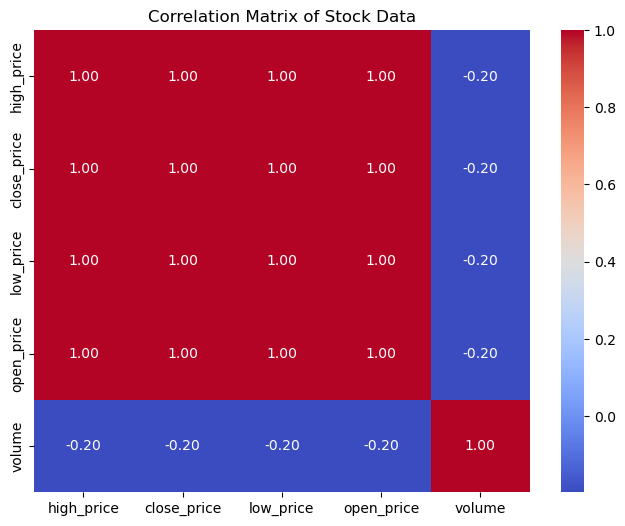

In [68]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Apple Stock Data")
plt.show()

In [69]:
twitter_data['high_price'] = pd.to_numeric(twitter_data['high_price'], errors='coerce')
twitter_data['close_price'] = pd.to_numeric(twitter_data['close_price'], errors='coerce')
twitter_data['low_price'] = pd.to_numeric(twitter_data['low_price'], errors='coerce')
twitter_data['open_price'] = pd.to_numeric(twitter_data['open_price'], errors='coerce')
twitter_data['volume'] = pd.to_numeric(twitter_data['volume'], errors='coerce')

In [70]:
numeric_df = twitter_data[["high_price", "close_price", "low_price", "open_price", "volume"]]
correlation_matrix = numeric_df.corr()

In [71]:
correlation_matrix

,high_price,close_price,low_price,open_price,volume
high_price,1.000000,0.998790,0.998347,0.998904,-0.018922
close_price,0.998790,1.000000,0.998991,0.997527,-0.037062
low_price,0.998347,0.998991,1.000000,0.998597,-0.050053
open_price,0.998904,0.997527,0.998597,1.000000,-0.034779
volume,-0.018922,-0.037062,-0.050053,-0.034779,1.000000


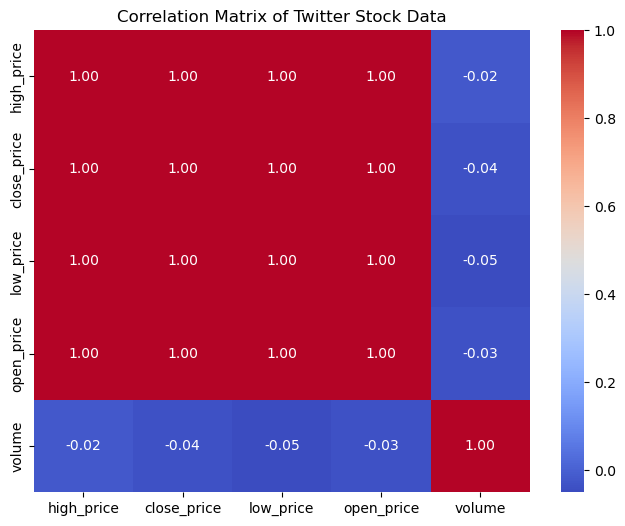

In [85]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Twitter Stock Data")
plt.show()

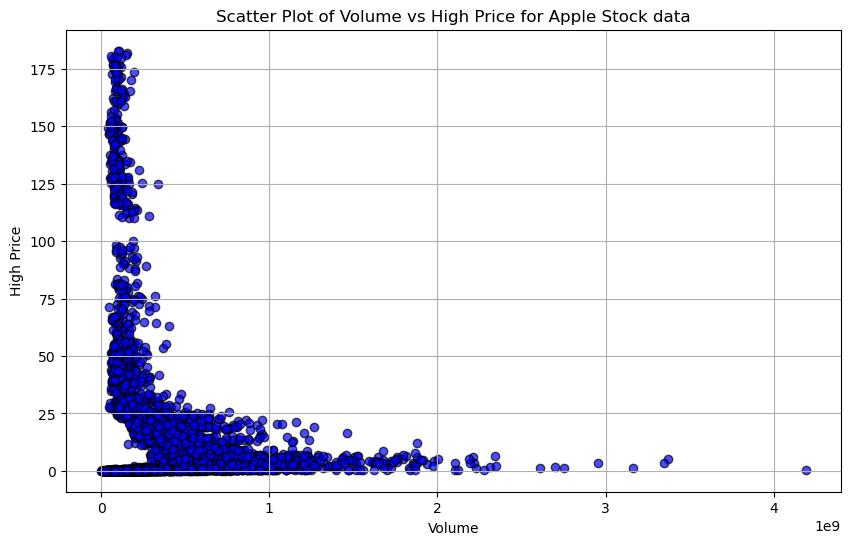

In [74]:
# Scatter plot for volume vs high price
plt.figure(figsize=(10, 6))
plt.scatter(apple_data['volume'], apple_data['high_price'], alpha=0.7, color='blue', edgecolor='k')
plt.title('Scatter Plot of Volume vs High Price for Apple Stock data')
plt.xlabel('Volume')
plt.ylabel('High Price')
plt.grid()
plt.show()

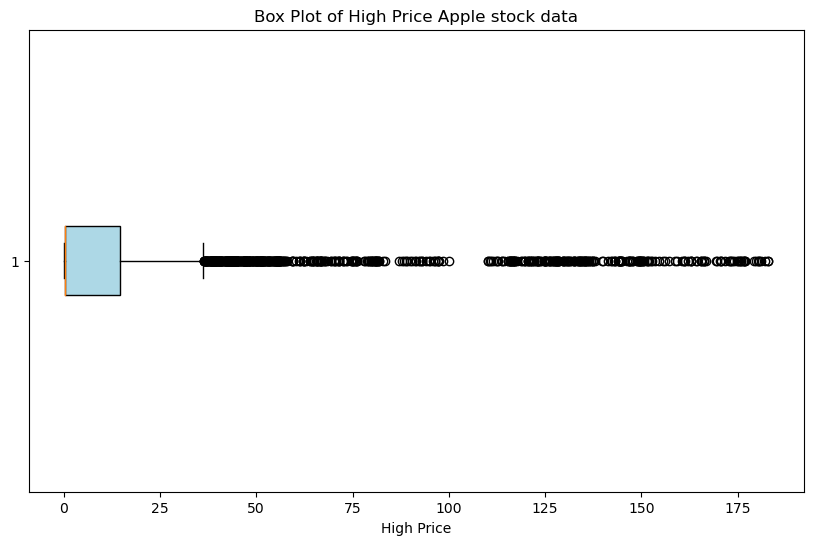

In [77]:
# Box plot for high price
plt.figure(figsize=(10, 6))
plt.boxplot(apple_data['high_price'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of High Price Apple stock data')
plt.xlabel('High Price')
plt.show()

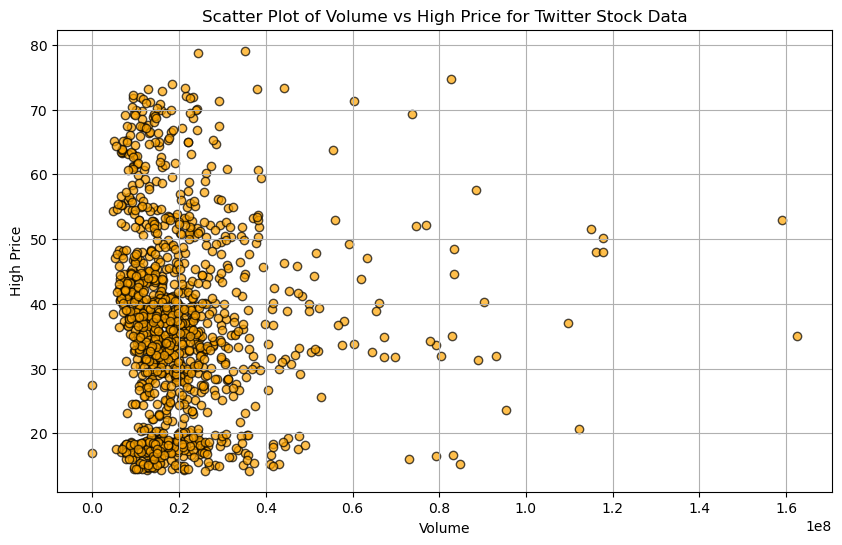

In [79]:
# Scatter plot for volume vs high price
plt.figure(figsize=(10, 6))
plt.scatter(twitter_data['volume'], twitter_data['high_price'], alpha=0.7, color='orange', edgecolor='k')
plt.title('Scatter Plot of Volume vs High Price for Twitter Stock Data')
plt.xlabel('Volume')
plt.ylabel('High Price')
plt.grid()
plt.show()

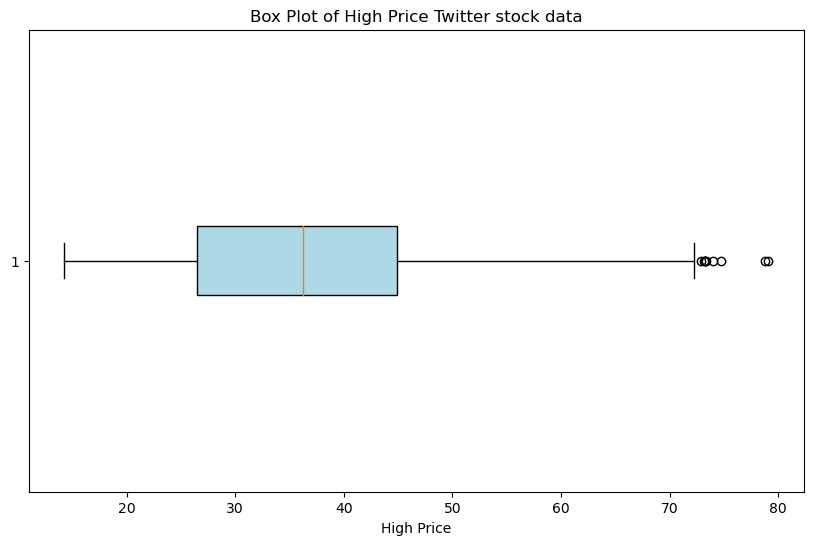

In [81]:
plt.figure(figsize=(10, 6))
plt.boxplot(twitter_data['high_price'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of High Price Twitter stock data')
plt.xlabel('High Price')
plt.show()

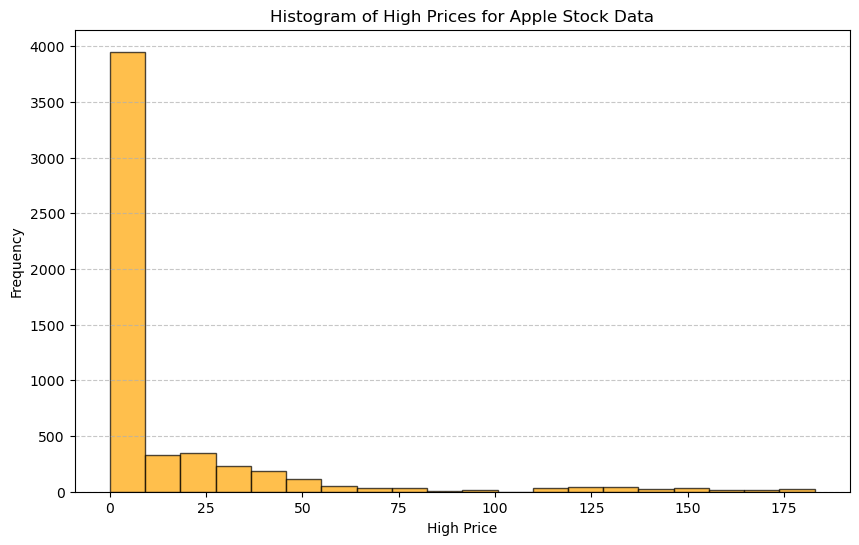

In [84]:
# Histogram for high prices in Apple data
plt.figure(figsize=(10, 6))
plt.hist(apple_data['high_price'], bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title('Histogram of High Prices for Apple Stock Data')
plt.xlabel('High Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

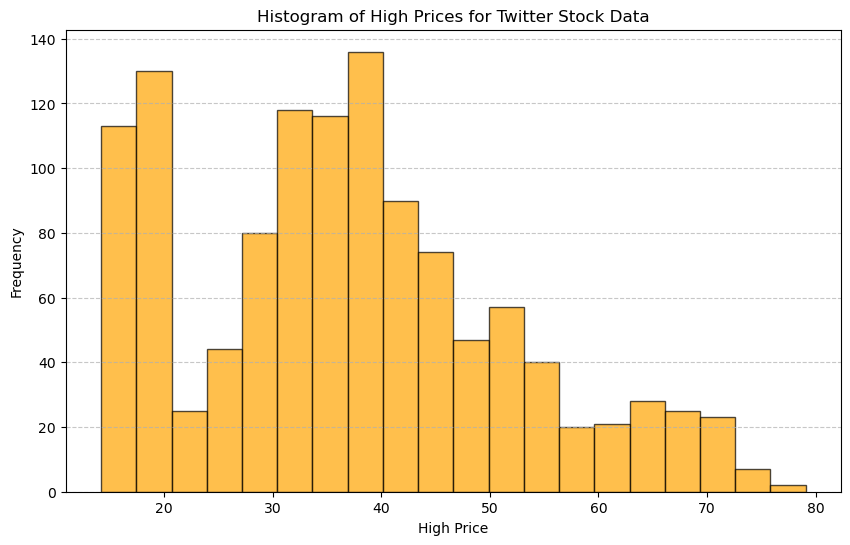

In [82]:
# Histogram for high prices in Twitter data
plt.figure(figsize=(10, 6))
plt.hist(twitter_data['high_price'], bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title('Histogram of High Prices for Twitter Stock Data')
plt.xlabel('High Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()